In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timezone


In [2]:
# Load list of dictionaries
with open("data/uptime_telemetry", "r") as f:
    a=json.load(f)

In [3]:
# Convert list of dictionaries to dataframe
uptime_df=pd.DataFrame.from_dict(a)

In [4]:
# Read data from csv
position_df=pd.read_csv("data/position_telemetry")

In [5]:
uptime_df.head()

,obc_received_timestamp,uptime
0,1649393052581,0.0
1,1649393062746,0.0
2,1649393072686,0.0
3,1649393082416,0.0
4,1649393092608,0.0


In [6]:
position_df.head()

,epoch,position_teme_km_x,position_teme_km_y,position_teme_km_z
0,2022-04-08 04:23:34+00:00,-3762.787201,1659.783861,5542.323345
1,2022-04-08 04:23:44+00:00,-3701.366216,1650.890358,5586.171051
2,2022-04-08 04:23:54+00:00,-3639.497837,1641.797305,5629.341661
3,2022-04-08 04:24:04+00:00,-3577.189573,1632.505816,5671.829991
4,2022-04-08 04:24:14+00:00,-3514.448987,1623.017030,5713.630940


In [7]:
uptime_df.describe()

,obc_received_timestamp,uptime
count,4.095500e+04,40908.000000
mean,1.650698e+12,142.146951
std,7.461088e+08,144.896225
min,1.649393e+12,-1.000000
25%,1.650047e+12,0.000000
50%,1.650713e+12,100.097582
75%,1.651338e+12,267.928093
max,1.651986e+12,434.000000


In [8]:
uptime_df.shape

(40955, 2)

In [9]:
position_df.describe()

,position_teme_km_x,position_teme_km_y,position_teme_km_z
count,259201.000000,259201.000000,259201.000000
mean,-0.393081,0.271389,-0.270656
std,4759.904379,941.116968,4770.815777
min,-6908.438359,-2081.450259,-6849.347933
25%,-4712.319227,-824.230991,-4728.627773
50%,0.000000,0.000000,0.000000
75%,4711.192501,824.904404,4727.199181
max,6909.323202,2080.797718,6846.775883


In [10]:
position_df.shape

(259201, 4)

In [11]:
uptime_df.columns

Index(['obc_received_timestamp', 'uptime'], dtype='object')

In [12]:
uptime_df.head()

,obc_received_timestamp,uptime
0,1649393052581,0.0
1,1649393062746,0.0
2,1649393072686,0.0
3,1649393082416,0.0
4,1649393092608,0.0


In [13]:
uptime_df.columns

Index(['obc_received_timestamp', 'uptime'], dtype='object')

In [14]:
uptime_df.obc_received_timestamp[0]

1649393052581

In [15]:
len(str(uptime_df.obc_received_timestamp[0]))

13

In [16]:
# Example Unix timestamp
unix_timestamp_ms = 1649393052581  
unix_timestamp_s = unix_timestamp_ms / 1000.0  # Corresponds to '2022-08-07 15:00:00 UTC'

# Convert Unix timestamp to datetime in UTC
utc_datetime = datetime.fromtimestamp(unix_timestamp_s,timezone.utc)
print("UTC datetime:", utc_datetime)

UTC datetime: 2022-04-08 04:44:12.581000+00:00


In [17]:
uptime_df["timestamp"]=uptime_df['obc_received_timestamp'].apply(lambda x: (datetime.fromtimestamp(x/1000.0,timezone.utc)))


In [18]:
unix_ts=list(uptime_df.obc_received_timestamp)
timestamp=list(uptime_df.timestamp)
uptime=list(uptime_df.uptime)
m=1000

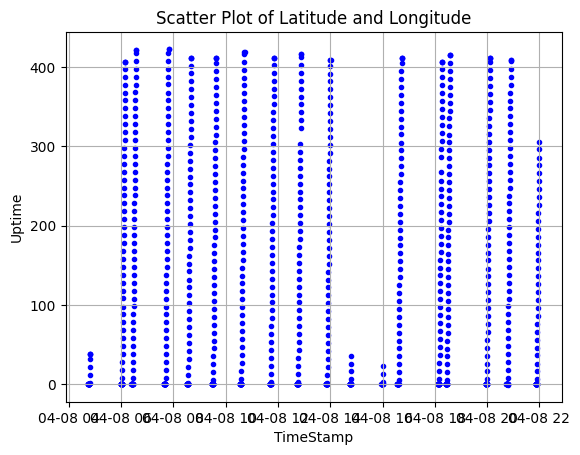

In [19]:
# Create the scatter plot
plt.figure()
plt.scatter(timestamp[0:m],uptime[0:m], c='blue',marker='.')#marker='o'

# Add titles and labels
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('TimeStamp')
plt.ylabel('Uptime')

# Optionally add grid
plt.grid(True)

# Show the plot
plt.show()

In [20]:
uptime_df.columns

Index(['obc_received_timestamp', 'uptime', 'timestamp'], dtype='object')

In [21]:
uptime_df.sort_values(by='timestamp', ascending=True,inplace=True)

In [22]:
uptime_df.head()

,obc_received_timestamp,uptime,timestamp
0,1649393052581,0.0,2022-04-08 04:44:12.581000+00:00
1,1649393062746,0.0,2022-04-08 04:44:22.746000+00:00
2,1649393072686,0.0,2022-04-08 04:44:32.686000+00:00
3,1649393082416,0.0,2022-04-08 04:44:42.416000+00:00
4,1649393092608,0.0,2022-04-08 04:44:52.608000+00:00


In [23]:
# Order columns again for simplifying things in the future
uptime_df=uptime_df.iloc[:,[2,0,1]]

### Data consinstency check: null values and negative values

I will not discard null values as a first step because these might be related with the obc anomaly.
The timestamp of the null values might contribute to understand the problem.

In [24]:
uptime_df.isnull().value_counts()

timestamp  obc_received_timestamp  uptime
False      False                   False     40908
                                   True         47
Name: count, dtype: int64

In [25]:
uptime_df.isna().value_counts()

timestamp  obc_received_timestamp  uptime
False      False                   False     40908
                                   True         47
Name: count, dtype: int64

In [26]:
null_mask = uptime_df.isnull().any(axis=1)
null_rows = uptime_df[null_mask]

In [27]:
null_rows.head()

,timestamp,obc_received_timestamp,uptime
516,2022-04-08 12:51:32.472000+00:00,1649422292472,NaN
745,2022-04-08 18:14:52.031000+00:00,1649441692031,NaN
1910,2022-04-09 13:20:08.923000+00:00,1649510408923,NaN
3191,2022-04-10 14:57:44.463000+00:00,1649602664463,NaN
3584,2022-04-10 20:33:32.356000+00:00,1649622812356,NaN


In [28]:
(uptime_df['uptime'] < 0).value_counts()

uptime
False    40866
True        89
Name: count, dtype: int64

In [29]:
negative_values_mask=uptime_df['uptime'] < 0

In [30]:
negative_values = uptime_df[negative_values_mask]

In [31]:
negative_values

,timestamp,obc_received_timestamp,uptime
905,2022-04-08 20:47:13.316000+00:00,1649450833316,-1.0
1020,2022-04-08 22:31:41.144000+00:00,1649457101144,-1.0
1832,2022-04-09 11:51:04.600000+00:00,1649505064600,-1.0
2290,2022-04-09 21:21:10.844000+00:00,1649539270844,-1.0
2429,2022-04-10 00:06:27.975000+00:00,1649549187975,-1.0
...,...,...,...
39006,2022-05-06 18:08:21.771000+00:00,1651860501771,-1.0
40042,2022-05-07 12:53:12.303000+00:00,1651927992303,-1.0
40475,2022-05-07 20:41:08.817000+00:00,1651956068817,-1.0
40601,2022-05-07 23:11:09.618000+00:00,1651965069618,-1.0


### Window

In [32]:
# I will drop null values now
uptime_df.shape


(40955, 3)

In [33]:
uptime_df.dropna(inplace=True)

In [34]:
uptime_df.shape

(40908, 3)

In [35]:
# Detect window start

In [36]:
# number of rows to shift
w=1

In [37]:
# Check if the uptime value is equal to the previous row and if it is zero uptime
uptime_df['same_as_last_value_and_value_is_zero'] =  (uptime_df['uptime'] == uptime_df['uptime'].shift(w)) & (uptime_df['uptime'] == 0)


In [38]:
uptime_df['same_as_last_value_and_value_is_zero'].value_counts()

same_as_last_value_and_value_is_zero
False    28059
True     12849
Name: count, dtype: int64

In [39]:
booting_mask=uptime_df['same_as_last_value_and_value_is_zero']

In [40]:
#uptime_df['different_value'] =  uptime_df['uptime'] != uptime_df['uptime'].shift(w)


In [41]:
#uptime_df['different_value'].value_counts()

In [42]:
uptime_df

,timestamp,obc_received_timestamp,uptime,same_as_last_value_and_value_is_zero
0,2022-04-08 04:44:12.581000+00:00,1649393052581,0.000000,False
1,2022-04-08 04:44:22.746000+00:00,1649393062746,0.000000,True
2,2022-04-08 04:44:32.686000+00:00,1649393072686,0.000000,True
3,2022-04-08 04:44:42.416000+00:00,1649393082416,0.000000,True
4,2022-04-08 04:44:52.608000+00:00,1649393092608,0.000000,True
...,...,...,...,...
40950,2022-05-08 04:51:10.063000+00:00,1651985470063,194.108080,False
40951,2022-05-08 04:51:19.689000+00:00,1651985479689,203.734508,False
40952,2022-05-08 04:51:29.848000+00:00,1651985489848,213.893375,False
40953,2022-05-08 04:51:39.906000+00:00,1651985499906,223.951156,False


In [43]:
# Cooldown 
# same as last value BUT not zero value
uptime_df['same_as_last_value_and_value_is_not_zero'] =  (uptime_df['uptime'] == uptime_df['uptime'].shift(w)) & (uptime_df['uptime'] != 0)


In [44]:
cooldown_mask=uptime_df['same_as_last_value_and_value_is_not_zero']

In [45]:
#uptime_df['is_booting_time'] =  uptime_df['same_as_last_value_and_value_is_zero'] == True


In [46]:
uptime_df.head()

,timestamp,obc_received_timestamp,uptime,same_as_last_value_and_value_is_zero,same_as_last_value_and_value_is_not_zero
0,2022-04-08 04:44:12.581000+00:00,1649393052581,0.0,False,False
1,2022-04-08 04:44:22.746000+00:00,1649393062746,0.0,True,False
2,2022-04-08 04:44:32.686000+00:00,1649393072686,0.0,True,False
3,2022-04-08 04:44:42.416000+00:00,1649393082416,0.0,True,False
4,2022-04-08 04:44:52.608000+00:00,1649393092608,0.0,True,False


In [47]:
import numpy as np

In [48]:
# List of conditions
conditions = [
        (booting_mask == True) ,
        (booting_mask == False) & (cooldown_mask == False),
        (cooldown_mask == True)
]
# List of values to return
choices  = [
       "booting",
       "active",
       "cooldown"
]
# create a new column in the DF based on the conditions
uptime_df["status"] = np.select(conditions, choices, "ERROR")

In [49]:
# List of conditions
conditions = [
        (uptime_df["status"] == "active") & (uptime_df["uptime"] == 0),
        (uptime_df["status"] == "booting"),
        (uptime_df["status"] == "active") & (uptime_df["uptime"] != 0),
        (uptime_df["status"] == "cooldown")
]
# List of values to return
choices  = [
       "start_boot",
       "booting",
       "active",
       "cooldown"
]
# create a new column in the DF based on the conditions
uptime_df["state"] = np.select(conditions, choices, "ERROR")

In [50]:
#((booting_mask == False) & (cooldown_mask == False) & uptime_df["uptime"]==0)

In [51]:
uptime_df.columns

Index(['timestamp', 'obc_received_timestamp', 'uptime',
       'same_as_last_value_and_value_is_zero',
       'same_as_last_value_and_value_is_not_zero', 'status', 'state'],
      dtype='object')

In [52]:
uptime_df.drop(['same_as_last_value_and_value_is_zero', 'same_as_last_value_and_value_is_not_zero',"status"], axis=1,inplace=True)

In [53]:
uptime_df.state.value_counts()

state
active        26255
booting       12849
cooldown       1063
start_boot      741
Name: count, dtype: int64

In [54]:
""" {
    id: idnum,
    start: timestamp
    booting_time: seconds
    active_time: seconds
    cooldown_time: seconds

}
 """

' {\n    id: idnum,\n    start: timestamp\n    booting_time: seconds\n    active_time: seconds\n    cooldown_time: seconds\n\n}\n '

In [55]:
uptime_df.columns

Index(['timestamp', 'obc_received_timestamp', 'uptime', 'state'], dtype='object')

In [56]:
rows=uptime_df.shape[0]

In [57]:
uptime_df.reset_index(drop=True,inplace=True)

In [58]:
#rows=517

In [59]:
uptime_df.state.value_counts()

state
active        26255
booting       12849
cooldown       1063
start_boot      741
Name: count, dtype: int64

In [60]:
lista=[]
w=0
iteration_for_new_event = True

for i in range(rows-1):
    if uptime_df["state"][i] == "start_boot":

        # Save window id
        id_window=w
        # Increase one the counter for next window
        w+=1
        #
        boot_start_ts = uptime_df["obc_received_timestamp"][i]   # unixtimestamp in mili seconds
        boot_start_dt = uptime_df["timestamp"][i]                 # datetime

    if uptime_df["state"][i] == "booting":
        booting_flag = 0

    if uptime_df["state"][i]  ==  "active" and booting_flag==0:
        # First active sample, save previous sample to get booting time
        boot_finish_ts = uptime_df["obc_received_timestamp"][i-1]    # unixtimestamp in mili seconds
        boot_finish_dt = uptime_df["timestamp"][i-1]                 # datetime
        booting_flag = 1

        # Do nothing until next status change

    # Check if the active window is finishing    
    if uptime_df["state"][i]  ==  "active" and (uptime_df["state"][i+1] == "cooldown" or uptime_df["state"][i+1] == "start_boot"):
        turn_off_ts = uptime_df["obc_received_timestamp"][i]    # unixtimestamp in mili seconds
        turn_off_dt = uptime_df["timestamp"][i]                 # datetime

    # Cooldown
    if uptime_df["state"][i]  ==  "cooldown" and uptime_df["state"][i+1] != "cooldown":
        cooldown_end_ts = uptime_df["obc_received_timestamp"][i]    # unixtimestamp in mili seconds
        cooldown_end_dt = uptime_df["timestamp"][i]                 # datetime
        # Save data for this event
        # Create dictionary
        iter_dict={
            "id": id_window,
            "boot_start_dt": boot_start_dt,
            "booting_time": (boot_finish_ts - boot_start_ts)/1000.0, 
            "active_time": (turn_off_ts - boot_finish_ts)/1000.0,
            "cooldown_time": (cooldown_end_ts - turn_off_ts)/1000.0

        }
        lista.append(iter_dict)


In [61]:
lista

[{'id': 0,
  'boot_start_dt': Timestamp('2022-04-08 04:44:12.581000+0000', tz='UTC'),
  'booting_time': 169.994,
  'active_time': 50.016,
  'cooldown_time': 19.932},
 {'id': 1,
  'boot_start_dt': Timestamp('2022-04-08 05:59:13.201000+0000', tz='UTC'),
  'booting_time': 190.177,
  'active_time': 409.878,
  'cooldown_time': 20.312},
 {'id': 2,
  'boot_start_dt': Timestamp('2022-04-08 06:23:34.131000+0000', tz='UTC'),
  'booting_time': 180.251,
  'active_time': 430.202,
  'cooldown_time': 9.868},
 {'id': 3,
  'boot_start_dt': Timestamp('2022-04-08 07:38:31.795000+0000', tz='UTC'),
  'booting_time': 180.05,
  'active_time': 430.016,
  'cooldown_time': 9.972},
 {'id': 4,
  'boot_start_dt': Timestamp('2022-04-08 08:30:49.805000+0000', tz='UTC'),
  'booting_time': 179.999,
  'active_time': 420.086,
  'cooldown_time': 20.048},
 {'id': 5,
  'boot_start_dt': Timestamp('2022-04-08 09:28:08.186000+0000', tz='UTC'),
  'booting_time': 180.085,
  'active_time': 419.855,
  'cooldown_time': 20.087},
 {